**Problem Statement**


Consider a dataset of flowers consisting of 5 classes. Implement an image classification model that predicts to which class the given flower in the image belongs to using ResNet.

**ResNet Implementation** 

Kaiming He et al. won the ILSVRC 2015 challenge using a Residual Network (or ResNet), that delivered an astounding top-five error rate under 3.6%. 
What is special about ResNet architecture is how it tackles the degradation problem most common in deep networks, where the model accuracy gets saturated and then degrades rapidly. It is important to note here that although some assume that the core idea behind ResNets is overcoming the notorious vanishing gradient problem, where gradients get infinitely small as they back-propagate to earlier layers of the network, this is not quite true.

Resnet architecture introduces an "identity shortcut connection" or often referred to as a "skip connection", which skips one or more layers. The shortcut connections simply perform identity mappings, and their outputs are added to the outputs of the stacked layers, as shown in the figure below. The skip function creates what is known as a residual block, F(x) in our figure, and that's where the name Residual Nets (ResNets) came from.

Comprehensive empirical evidence has shown that the addition of these identity mappings allows the model to go deeper without degradation in performance and such networks are easier to optimize than plain stacked layers. There are several variants of ResNets, such as ResNet50, ResNet101, ResNet152; the number represents the number of layers (depth) of the ResNet.

Here, we have used Resnet-50 architecture.






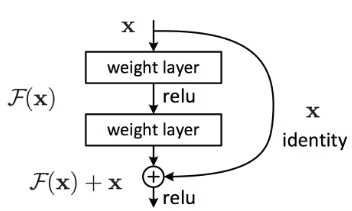

Importing required libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import PIL
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam

Importing the dataset

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


Printing the directory structure of dataset

In [ ]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/roses/6347847065_83cf87333b_n.jpg


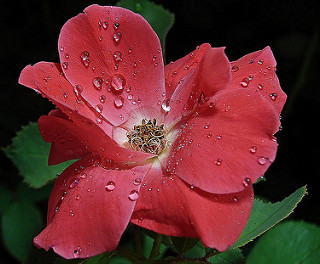

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

Splitting the dataset into training and validation data.With each epoch, our model will get trained on the training subset, while it checks its performance on the validation data at each epoch.

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, label_mode='categorical', image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, label_mode="categorical", image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Printing the classes of the dataset

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


From the keras applications, we can pick and select any of the state of the art models and use it for our problem. We are using ResNet-50, but the same procedure can be used for any other model as well. After importing pre-trained model, we will also add a fully connected and output layer where actual learning can take place.In the output layer we use the softmax activation function and we have 5 output neurons corresponding to the 5 classes in our data.

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


Showing the model architecture

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

Now that our model is ready we simply compile it and train it over 03 epochs for now.

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs=3
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/3
92/92 [==============================] - 421s 5s/step - loss: 0.2513 - accuracy: 0.9142 - val_loss: 0.4852 - val_accuracy: 0.8338
Epoch 2/3
92/92 [==============================] - 421s 5s/step - loss: 0.1496 - accuracy: 0.9475 - val_loss: 0.3883 - val_accuracy: 0.8638
Epoch 3/3
92/92 [==============================] - 418s 5s/step - loss: 0.0992 - accuracy: 0.9734 - val_loss: 0.3667 - val_accuracy: 0.8597


Evaluating the model: we have used matplotlib library to plot the train and validation accuracy with respect to each epoch. These logs had been stored in the history variable during the time of training.

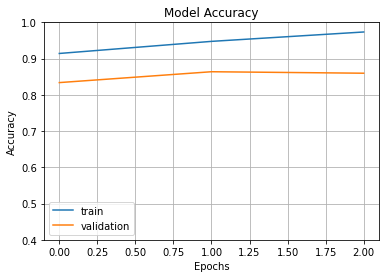

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Plotting the loss function

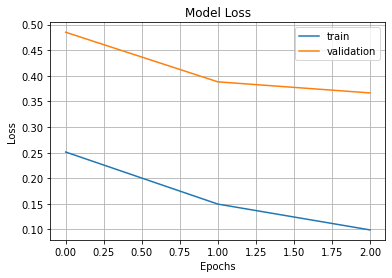

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


To make predictions on any image, we simply have to run a few pre-processing steps to ensure that the images dimensions are same as the one that our model was trained on. We use the opencv library for this.

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


For now we will run predictions on a sample image of rose from our data.

In [ ]:
pred=resnet_model.predict(image)
print(pred)

[[1.0168758e-03 1.5650099e-03 8.1420743e-01 4.5021807e-04 1.8276037e-01]]


we will run predictions on a sample image of rose from the data.

Printing predicted class

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
